# Importing all Necessary Libraries

In [9]:
# For data access
import pandas as pd

# For splitting data
import numpy as np
from sklearn.model_selection import train_test_split

# Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn

# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Using KNN Imputer
from sklearn.impute import KNNImputer

# Using cross_value for cross-validation
from sklearn.model_selection import cross_val_score

# Using KFold cross-validation
from sklearn.model_selection import KFold as kf

# Using StratifiedKFold and GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Using accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Using confusion matrix
from sklearn.metrics import confusion_matrix

# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing visualization libraries
import seaborn as sns

import matplotlib.pyplot as plt


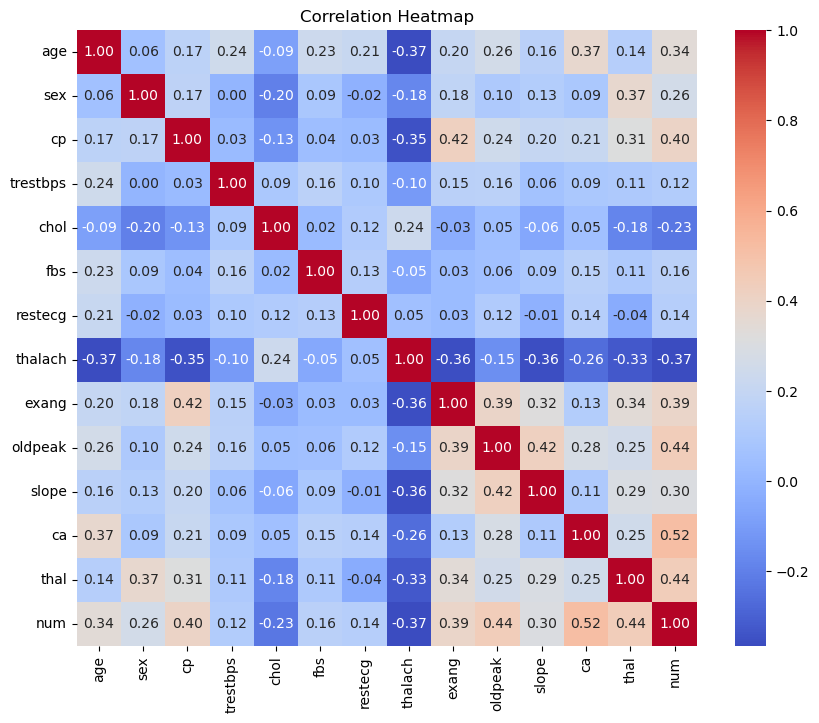

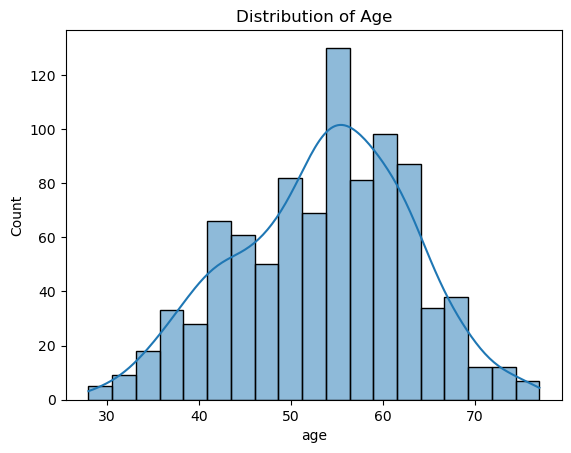

In [10]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = a.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
import seaborn as sns

# Plotting a histogram for a numerical column, e.g., 'age'
sns.histplot(a['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

1    726
0    194
Name: sex, dtype: int64


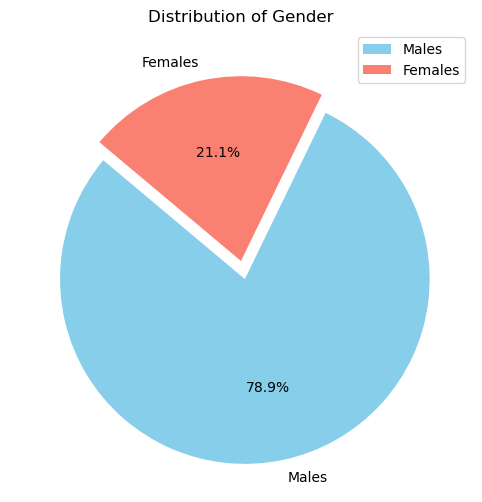

In [11]:
sex_counts =a['sex'].value_counts()
print(a['sex'].value_counts())
colors = ['skyblue', 'salmon']
labels = ['Males', 'Females']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Gender')
plt.legend()
plt.show()


# KNN Classfier using Mean Imputation

Count of NUll Values for each Attribute:

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


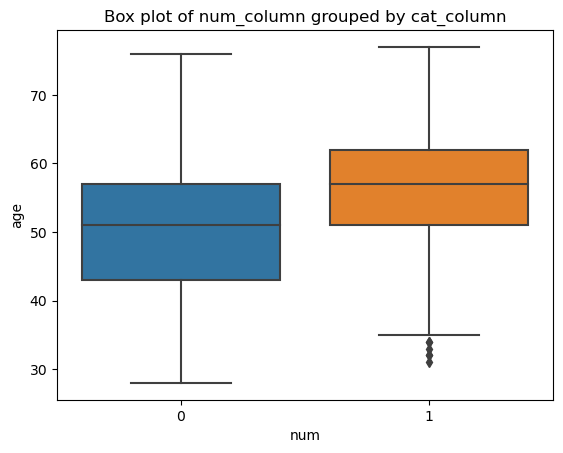

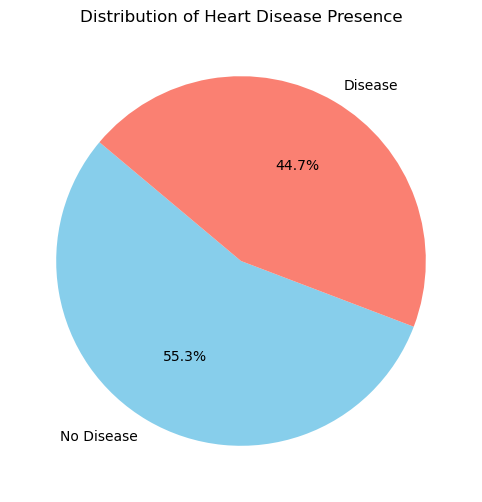

The count of missing values after Applying Mean Imputation:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64




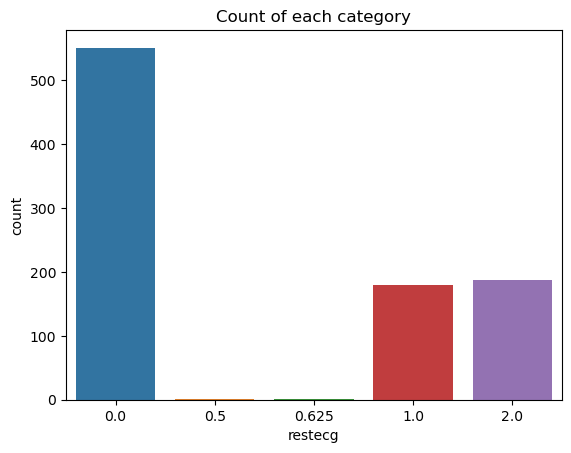

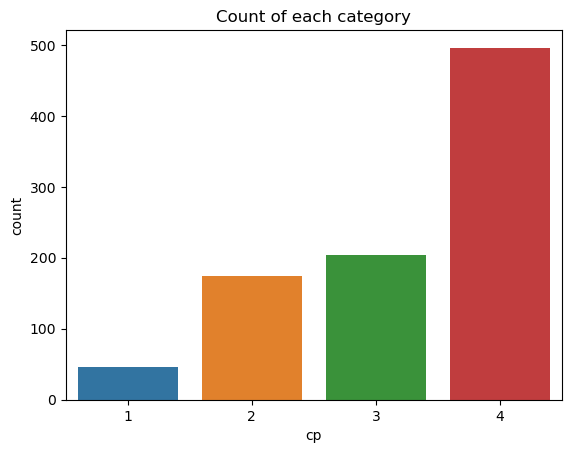

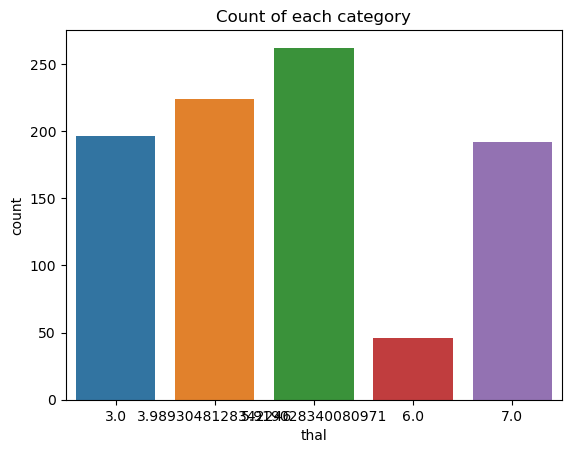

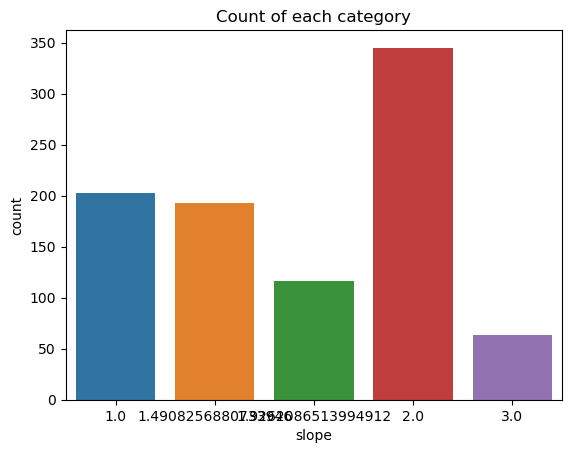

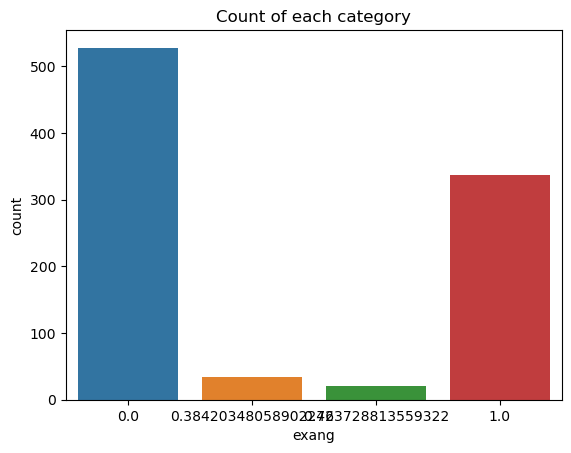

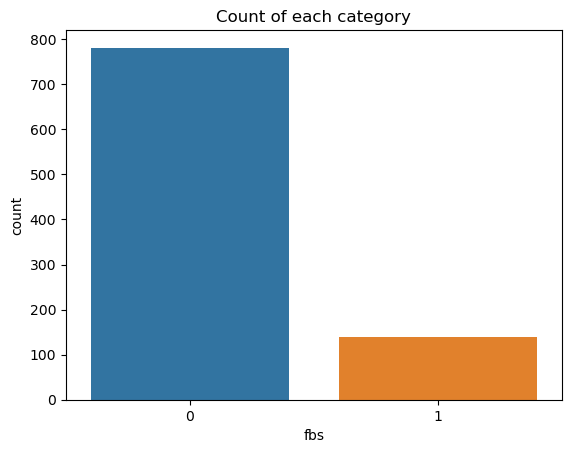

Count Of Target Variable Classes:
 1    509
0    411
Name: num, dtype: int64


In [12]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Displaying the count of missing values
print("Count of NUll Values for each Attribute:\n")
print(a.isnull().sum())

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Converting 'num' column to binary (0 or 1)
a['num'] = np.where(a['num'] > 0, 1, 0)


# Assuming 'num_column' is a numerical column and 'cat_column' is a categorical column
sns.boxplot(data=a, x='num', y='age')
plt.title('Box plot of num_column grouped by cat_column')
plt.show()


# Filling missing values with group-wise means
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('mean'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('mean'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('mean'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('mean'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('mean'), inplace=True)
a['chol'].fillna(a['chol'].mean(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('mean'), inplace=True)
a['thalach'].fillna(a['thalach'].mean(), inplace=True)

target_counts = a['num'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon']
labels = ['No Disease', 'Disease']
explode = (0, 0)  # explode 1st slice for emphasis

plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribution of Heart Disease Presence")
plt.show()

# Displaying the count of missing values after filling
print("The count of missing values after Applying Mean Imputation:\n")
print(a.isnull().sum())
print("\n")

sns.countplot(data=a, x='restecg')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='cp')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='thal')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='slope')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='exang')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='fbs')
plt.title('Count of each category')
plt.show()

a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])


# Separating features and target variable
X = a.drop("num", axis=1)
y = a.num

# Displaying the count of target variable classes
print("Count Of Target Variable Classes:\n",y.value_counts())

# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


### Hyper parameter Tuning

In [ ]:

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1: manhattan_distance, 2: euclidean_distance
}
knn_classifier = KNeighborsClassifier()

knn_randomcv = RandomizedSearchCV(estimator=knn_classifier, param_distributions=knn_param_grid, n_iter=100,
                                  cv=skf, verbose=1, n_jobs=-1)

knn_randomcv.fit(X, y)

print("Best Parameters (KNN RandomizedSearch):", knn_randomcv.best_params_)


knn_param_grid_refined = {
    'n_neighbors': [knn_randomcv.best_params_['n_neighbors'] - 2, 
                    knn_randomcv.best_params_['n_neighbors'], 
                    knn_randomcv.best_params_['n_neighbors'] + 2],
    'weights': [knn_randomcv.best_params_['weights']],
    'algorithm': [knn_randomcv.best_params_['algorithm']],
    'p': [knn_randomcv.best_params_['p']]
}

knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(estimator=knn_classifier, 
                               param_grid=knn_param_grid_refined, 
                               cv=skf, 
                               n_jobs=-1, 
                               verbose=2)

knn_grid_search.fit(X, y)

print("Best Parameters (KNN GridSearch):", knn_grid_search.best_params_)
print("Best Score (KNN GridSearch):", knn_grid_search.best_score_ * 100)


In [13]:
# Define the parameter grid
from sklearn.neighbors import KNeighborsClassifier as knn
param_grid = {
    'algorithm': 'ball_tree',
    'n_neighbors': 5,
    'p': 1, 
    'weights': 'uniform'
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t KnnClassifierr Mean Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   # Create a RandomForestClassifier with the provided parameters
    knn_classifier = knn(**param_grid)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # make the predictions on the test data
    test_pred = knn_classifier.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit-{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 KnnClassifierr Mean Imputation: 

Split-1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[56  3]
 [ 4 69]]
 Test Accuracy: 94.7
 Test Precision: 95.83
 Test Recall: 94.52
 Test F1 Score: 95.17
--------------------------------******------------------------------
Split-2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[55  4]
 [ 5 68]]
 Test Accuracy: 93.18
 Test Precision: 94.44
 Test Recall: 93.15
 Test F1 Score: 93.79
--------------------------------******------------------------------
Split-3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 5 68]]
 Test Accuracy: 92.42
 Test Precision: 93.15
 Test Recall: 93.15
 Test F1 Score: 93.15
--------------------------------******------------------------------
Split-4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[53  5]
 [ 3 70]]
 Test Accuracy: 93.89
 Test Precision: 93.33
 Test Recall: 95.89
 Test F1 Score: 94.59
--------------------------------******------------------------------
Split-5:

C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

# KNN Classifier using mode Imputation

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


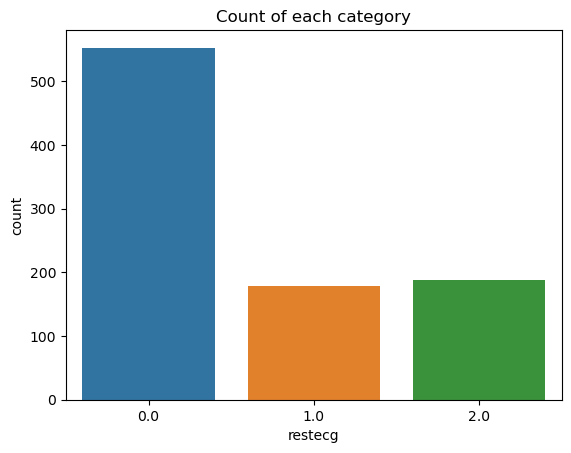

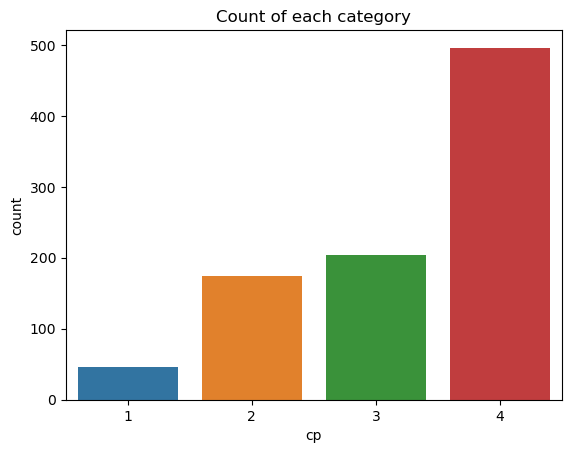

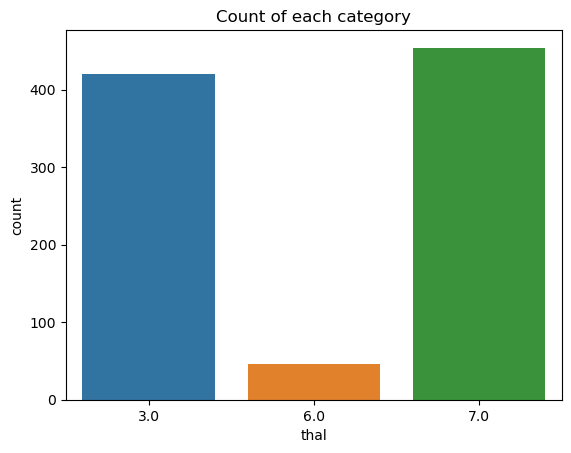

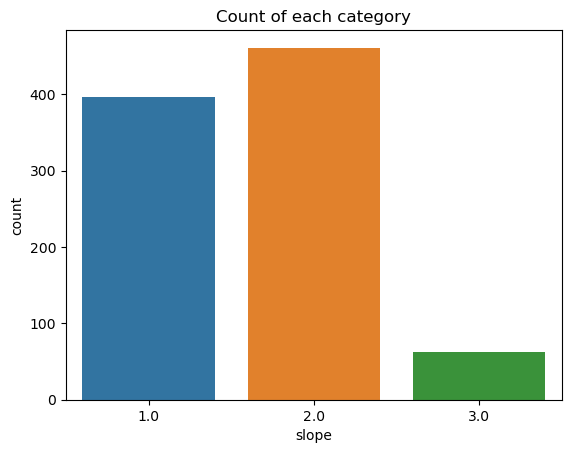

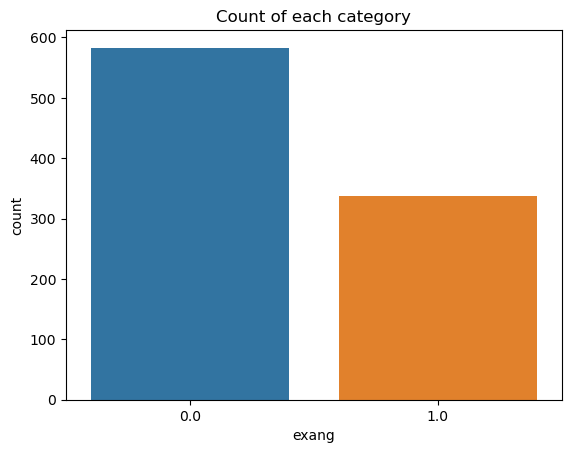

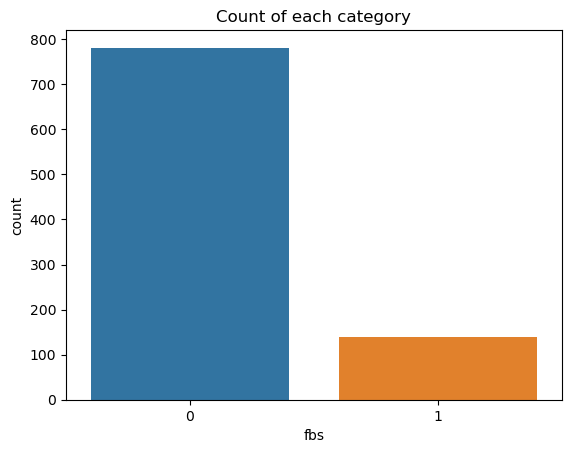

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [14]:
# Load the dataset
a = pd.read_csv('sathvi dataset.csv')

# Replace '?' with NaN
a.replace('?', np.NAN, inplace=True)

# Convert selected columns to numeric
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Convert 'num' column to binary labels (0 or 1)
a['num'] = np.where(a['num'] > 0, 1, 0)


print(a.isnull().sum())

# Fill missing values using mode for certain columns
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform(lambda x: x.mode()[0]), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform(lambda x: x.mode()[0]), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform(lambda x: x.mode()[0]), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform(lambda x: x.mode()[0]), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform(lambda x: x.mode()[0]), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform(lambda x: x.mode()[0]), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform(lambda x: x.mode()[0]), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform(lambda x: x.mode()[0]), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform(lambda x: x.mode()[0]), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform(lambda x: x.mode()[0]), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform(lambda x: x.mode()[0]), inplace=True)
a['chol'].fillna(a['chol'].mode()[0], inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0), inplace=True)
a['thalach'].fillna(a['thalach'].mode()[0], inplace=True)

sns.countplot(data=a, x='restecg')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='cp')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='thal')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='slope')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='exang')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='fbs')
plt.title('Count of each category')
plt.show()

# Check for remaining missing values
print(a.isnull().sum())

# Perform one-hot encoding
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Prepare features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num


# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

## Hyper parameter Tuning

In [16]:
# Define the parameter grid
param_grid = {
    'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t KnnClassifierr Mode Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   # Create a RandomForestClassifier with the provided parameters
    knn_classifier = knn(**param_grid)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # make the predictions on the test data
    test_pred = knn_classifier.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit-{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 KnnClassifierr Mode Imputation: 

Split-1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[56  3]
 [ 7 66]]
 Test Accuracy: 92.42
 Test Precision: 95.65
 Test Recall: 90.41
 Test F1 Score: 92.96
--------------------------------******------------------------------
Split-2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[53  6]
 [ 6 67]]
 Test Accuracy: 90.91
 Test Precision: 91.78
 Test Recall: 91.78
 Test F1 Score: 91.78
--------------------------------******------------------------------
Split-3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[50  9]
 [ 3 70]]
 Test Accuracy: 90.91
 Test Precision: 88.61
 Test Recall: 95.89
 Test F1 Score: 92.11
--------------------------------******------------------------------
Split-4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[48 10]
 [ 5 68]]
 Test Accuracy: 88.55
 Test Precision: 87.18
 Test Recall: 93.15
 Test F1 Score: 90.07
--------------------------------******------------------------------
Split-5

C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

# SVM Classifier using Median Imputation

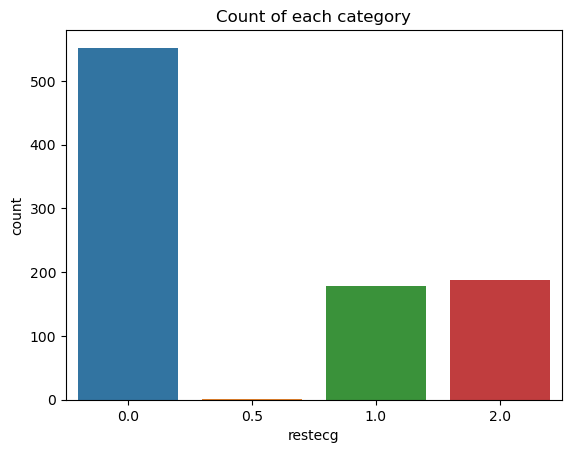

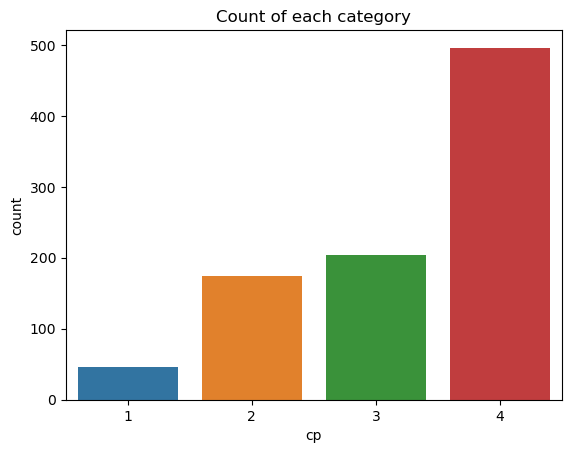

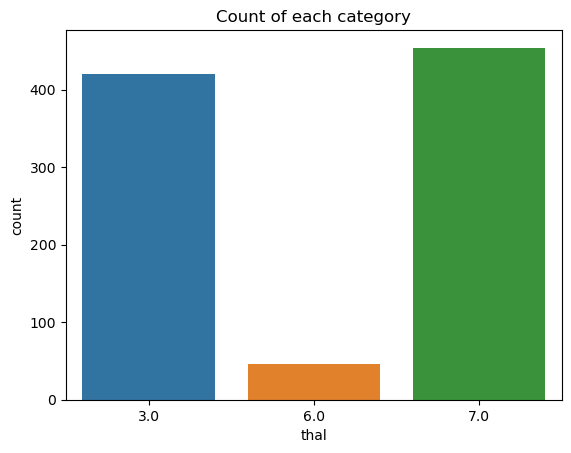

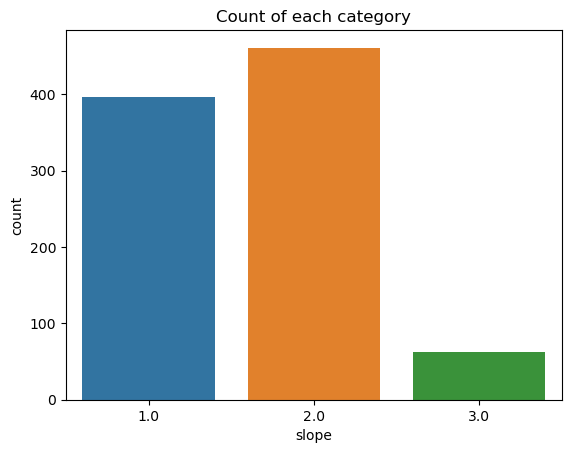

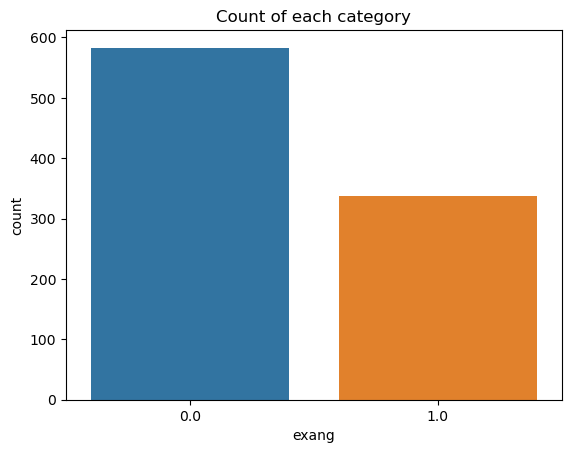

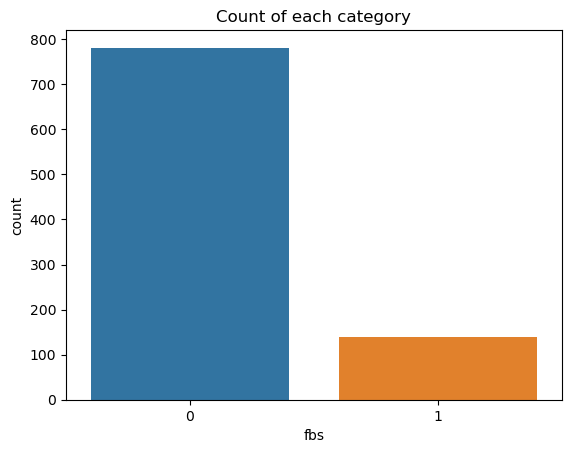

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [18]:
# Load the dataset
a = pd.read_csv('sathvi dataset.csv')
a.replace('?', pd.NA, inplace=True)

# Convert columns to numeric, handle missing values, and create binary 'num' column
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

a['num'] = np.where(a['num'] > 0, 1, 0)

# Fill missing values using median imputation
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('median'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('median'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('median'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('median'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('median'), inplace=True)
a['chol'].fillna(a['chol'].median(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('median'), inplace=True)
a['thalach'].fillna(a['thalach'].median(), inplace=True)

sns.countplot(data=a, x='restecg')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='cp')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='thal')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='slope')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='exang')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='fbs')
plt.title('Count of each category')
plt.show()
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

## Hyper parameter Tuning

In [19]:
# Define the parameter grid
param_grid = {
   'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t KnnClassifierr Median Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   # Create a RandomForestClassifier with the provided parameters
    knn_classifier = knn(**param_grid)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # make the predictions on the test data
    test_pred = knn_classifier.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit-{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 KnnClassifierr Median Imputation: 

Split-1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[55  4]
 [ 9 64]]
 Test Accuracy: 90.15
 Test Precision: 94.12
 Test Recall: 87.67
 Test F1 Score: 90.78
--------------------------------******------------------------------
Split-2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 5 68]]
 Test Accuracy: 92.42
 Test Precision: 93.15
 Test Recall: 93.15
 Test F1 Score: 93.15
--------------------------------******------------------------------
Split-3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[51  8]
 [ 3 70]]
 Test Accuracy: 91.67
 Test Precision: 89.74
 Test Recall: 95.89
 Test F1 Score: 92.72
--------------------------------******------------------------------
Split-4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[51  7]
 [ 6 67]]
 Test Accuracy: 90.08
 Test Precision: 90.54
 Test Recall: 91.78
 Test F1 Score: 91.16
--------------------------------******------------------------------
Split

C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

# SVM Classifier using KNNI Imputer

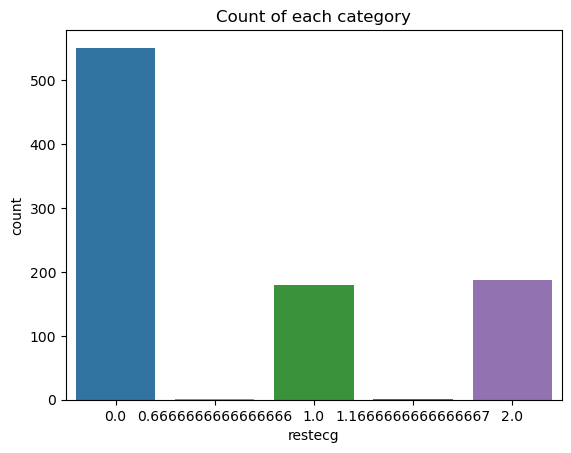

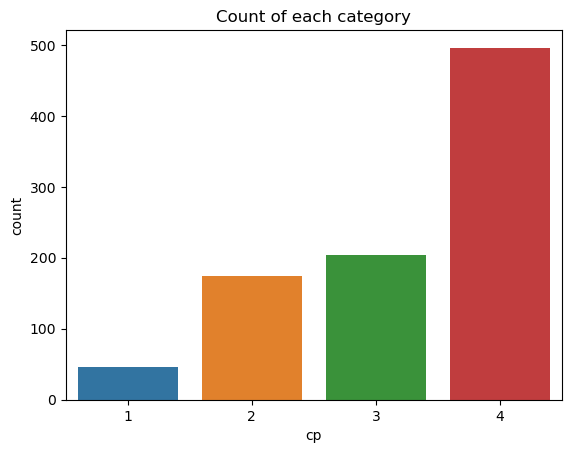

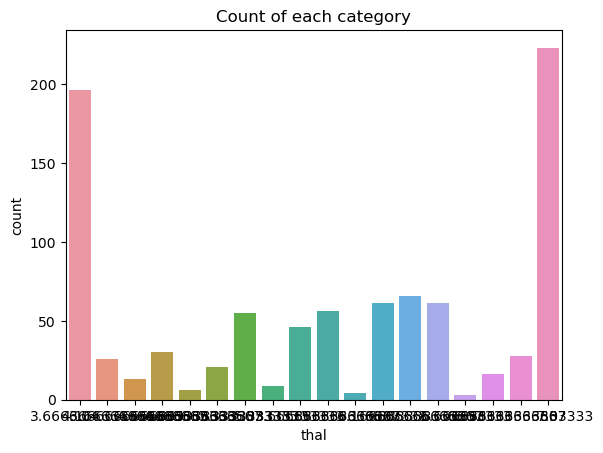

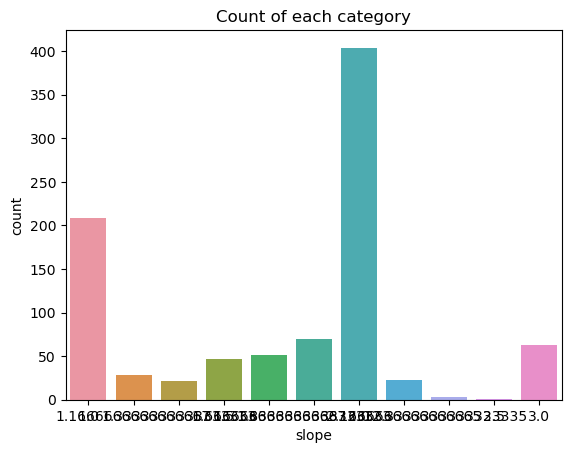

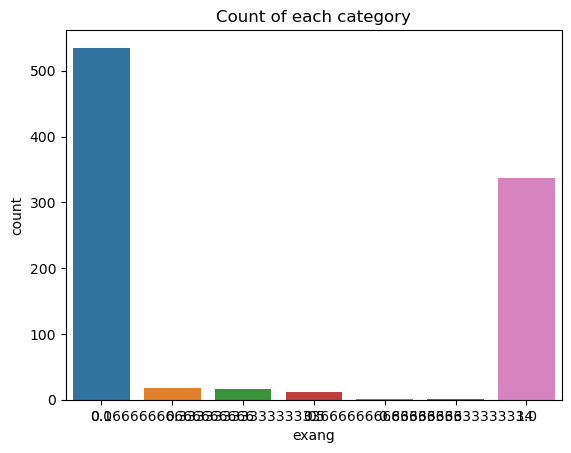

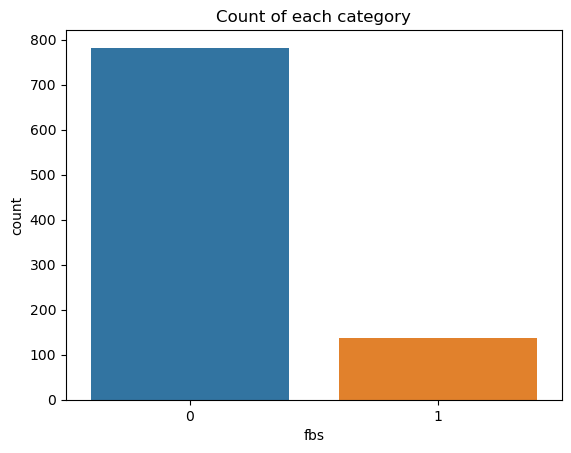

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
1    509
0    411
Name: num, dtype: int64


In [20]:
# Read the dataset
a = pd.read_csv('sathvi dataset.csv')

# Replace '?' with NaN
a.replace('?', pd.NA, inplace=True)

# Convert selected columns to numeric, handling errors as NaN
numeric_columns = ['age', 'restecg', 'oldpeak', 'fbs', 'chol', 'thalach', 'trestbps', 'exang', 'thal', 'slope', 'ca']
a[numeric_columns] = a[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Initialize KNNImputer for imputing missing values
knn_imputer = KNNImputer(n_neighbors=6)

# Convert target variable to binary
a['num'] = np.where(a['num'] > 0, 1, 0)

# Columns to impute using KNNImputer
columns_to_impute = ['restecg', 'exang', 'slope', 'thal', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

# Impute missing values using KNNImputer
a[columns_to_impute] = knn_imputer.fit_transform(a[columns_to_impute])

# Convert fbs values to binary
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)

sns.countplot(data=a, x='restecg')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='cp')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='thal')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='slope')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='exang')
plt.title('Count of each category')
plt.show()
sns.countplot(data=a,x='fbs')
plt.title('Count of each category')
plt.show()

# Check for remaining missing values
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Store column names
c = a.columns

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Display class distribution
print(y.value_counts())

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


## Hyper parameter Tuning

In [22]:
# Define the parameter grid
param_grid = {
   'algorithm': 'kd_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t KnnClassifierr KNN Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   # Create a RandomForestClassifier with the provided parameters
    knn_classifier = knn(**param_grid)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # make the predictions on the test data
    test_pred = knn_classifier.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit-{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 KnnClassifierr KNN Imputation: 

Split-1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[52  7]
 [10 63]]
 Test Accuracy: 87.12
 Test Precision: 90.0
 Test Recall: 86.3
 Test F1 Score: 88.11
--------------------------------******------------------------------
Split-2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[48 11]
 [12 61]]
 Test Accuracy: 82.58
 Test Precision: 84.72
 Test Recall: 83.56
 Test F1 Score: 84.14
--------------------------------******------------------------------
Split-3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[43 16]
 [15 58]]
 Test Accuracy: 76.52
 Test Precision: 78.38
 Test Recall: 79.45
 Test F1 Score: 78.91
--------------------------------******------------------------------
Split-4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[49  9]
 [11 62]]
 Test Accuracy: 84.73
 Test Precision: 87.32
 Test Recall: 84.93
 Test F1 Score: 86.11
--------------------------------******------------------------------
Split-5: 


C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

93.369
89.995
91.086
82.174
